In [1]:
import torch

from lfi import inference
from lfi import simulators
from lfi import utils

from matplotlib import pyplot as plt

# use GPU if available
if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.set_default_tensor_type("torch.cuda.FloatTensor")
else:
    device = torch.device("cpu")
    torch.set_default_tensor_type("torch.FloatTensor")

# SNL 

In [2]:
# get simulator and prior
simulator, prior = simulators.get_simulator_and_prior("mg1")

# get neural likelihood
neural_likelihood = utils.get_neural_likelihood(
    "maf",
    parameter_dim=simulator.parameter_dim,
    observation_dim=simulator.observation_dim,
)

# create inference method
inference_method = inference.SNL(
    simulator=simulator,
    prior=prior,
    true_observation=simulator.get_ground_truth_observation(),
    neural_likelihood=neural_likelihood,
    mcmc_method="slice-np",
)

/home/janfb/anaconda3/envs/lfi/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


-------------------------:59<08:58, 59.85s/it]
||||| ROUND 1 STATS |||||:
-------------------------
Epochs trained: 220
Best validation performance: 13.9713

Tuning bracket width...: 100%|██████████| 50/50 [00:08<00:00,  5.61it/s]

Generating samples: 100%|██████████| 20/20 [00:15<00:00,  1.32it/s]

Generating samples: 100%|██████████| 1000/1000 [12:37<00:00,  1.32it/s]
-------------------------
||||| ROUND 1 STATS |||||:
-------------------------
Epochs trained: 220
Best validation performance: 13.9713

-------------------------14:22<37:42, 282.79s/it]
||||| ROUND 2 STATS |||||:
-------------------------
Epochs trained: 39
Best validation performance: 15.9874

Generating samples: 100%|██████████| 20/20 [00:15<00:00,  1.30it/s]

Generating samples:  97%|█████████▋| 970/1000 [12:15<00:22,  1.33it/s]


Generating samples: 100%|██████████| 1000/1000 [12:38<00:00,  1.32it/s]
-------------------------
||||| ROUND 2 STATS |||||:
-------------------------
Epochs trained: 39
Best validation performance: 15.9874

-------------------------29:16<54:23, 466.17s/it]
||||| ROUND 3 STATS |||||:
-------------------------
Epochs trained: 151
Best validation performance: 20.2177

Generating samples: 100%|██████████| 20/20 [00:15<00:00,  1.30it/s]

Generating samples: 100%|██████████| 1000/1000 [13:03<00:00,  1.28it/s]
-------------------------
||||| ROUND 3 STATS |||||:
-------------------------
Epochs trained: 151
Best validation performance: 20.2177

-------------------------43:08<57:35, 575.87s/it]
||||| ROUND 4 STATS |||||:
-------------------------
Epochs trained: 32
Best validation performance: 21.2450

Generating samples: 100%|██████████| 20/20 [00:16<00:00,  1.24it/s]

Generating samples:  99%|█████████▉| 990/1000 [13:03<00:07,  1.25it/s]


Generating samples: 100%|██████████| 1000/1000 [13:10<00:00,  1.26it/s]
-------------------------
||||| ROUND 4 STATS |||||:
-------------------------
Epochs trained: 32
Best validation performance: 21.2450

-------------------------57:13<54:42, 656.44s/it]
||||| ROUND 5 STATS |||||:
-------------------------
Epochs trained: 28
Best validation performance: 21.4345

Generating samples: 100%|██████████| 20/20 [00:15<00:00,  1.28it/s]

Generating samples: 100%|██████████| 1000/1000 [13:00<00:00,  1.28it/s]
-------------------------
||||| ROUND 5 STATS |||||:
-------------------------
Epochs trained: 28
Best validation performance: 21.4345



-------------------------1:11:15<47:28, 712.17s/it]
||||| ROUND 6 STATS |||||:
-------------------------
Epochs trained: 29
Best validation performance: 21.5397

Generating samples: 100%|██████████| 20/20 [00:15<00:00,  1.26it/s]

Generating samples: 100%|██████████| 1000/1000 [13:09<00:00,  1.27it/s]
-------------------------
||||| ROUND 6 STATS |||||:
-------------------------
Epochs trained: 29
Best validation performance: 21.5397

-------------------------1:25:59<38:10, 763.63s/it]
||||| ROUND 7 STATS |||||:
-------------------------
Epochs trained: 42
Best validation performance: 22.3217



Generating samples: 100%|██████████| 20/20 [00:15<00:00,  1.25it/s]

Generating samples: 100%|██████████| 1000/1000 [13:20<00:00,  1.25it/s]
-------------------------
||||| ROUND 7 STATS |||||:
-------------------------
Epochs trained: 42
Best validation performance: 22.3217

-------------------------1:40:56<26:47, 803.87s/it]
||||| ROUND 8 STATS |||||:
-------------------------
Epochs trained: 40
Best validation performance: 22.3595

Generating samples: 100%|██████████| 20/20 [00:16<00:00,  1.23it/s]

Generating samples: 100%|██████████| 1000/1000 [13:22<00:00,  1.25it/s]
-------------------------
||||| ROUND 8 STATS |||||:
-------------------------
Epochs trained: 40
Best validation performance: 22.3595

-------------------------1:58:30<14:38, 878.93s/it]
||||| ROUND 9 STATS |||||:
-------------------------
Epochs trained: 98
Best validation performance: 22.9931

Generating samples:   0%|          | 0/20 [00:00<?, ?it/s]


Generating samples: 100%|██████████| 20/20 [00:16<00:00,  1.23it/s]

Generating samples: 100%|██████████| 1000/1000 [13:36<00:00,  1.22it/s]
-------------------------
||||| ROUND 9 STATS |||||:
-------------------------
Epochs trained: 98
Best validation performance: 22.9931

-------------------------[2:13:40<00:00, 888.00s/it]
||||| ROUND 9 STATS |||||:
-------------------------
Epochs trained: 98
Best validation performance: 22.9931

Generating samples: 100%|██████████| 10000/10000 [2:14:03<00:00,  1.24it/s] 


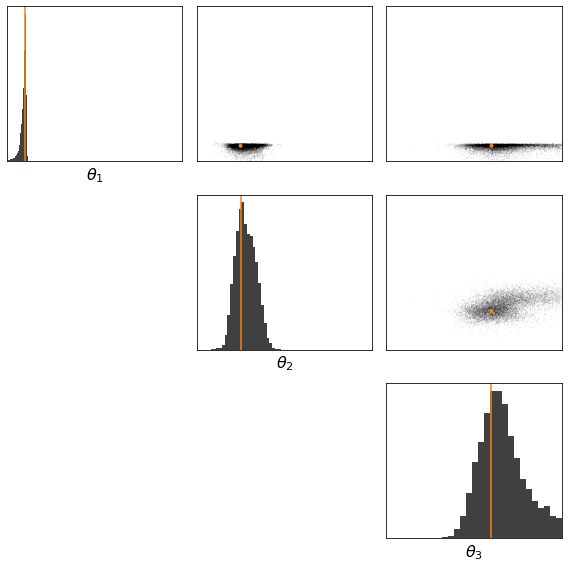

In [3]:
# run inference
inference_method.run_inference(num_rounds=10, num_simulations_per_round=1000)

# sample posterior
samples = inference_method.sample_posterior(num_samples=10000)

# plot samples
utils.plot_hist_marginals(
    utils.tensor2numpy(samples),
    lims=simulator.parameter_plotting_limits,
    ground_truth=utils.tensor2numpy(simulator.get_ground_truth_parameters()).reshape(
        -1
    ),
)
plt.show()

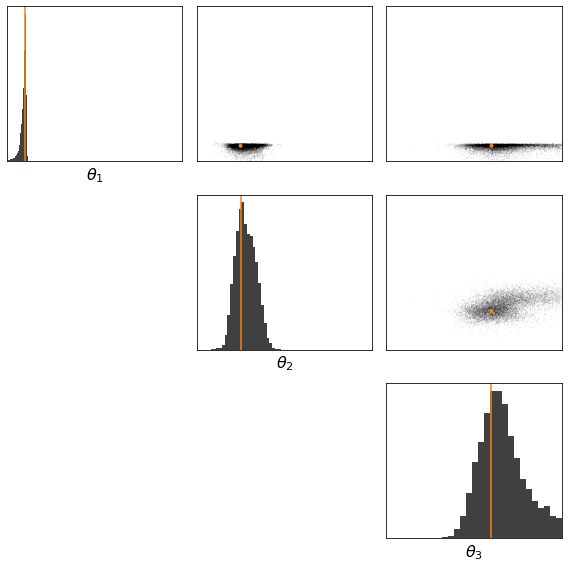

In [5]:
# plot samples
utils.plot_hist_marginals(
    utils.tensor2numpy(samples),
    lims=simulator.parameter_plotting_limits,
    ground_truth=utils.tensor2numpy(simulator.get_ground_truth_parameters()).reshape(
        -1
    ),
)
plt.show()